In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
card = pd.read_csv(r'/content/archive (7).zip')

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
card.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [ ]:
card.head(15)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
5,113,0,4,2,1,2,44,52,61.2,57.2
6,50,0,3,2,1,1,50,59,50.4,64.9
7,11,0,1,2,1,2,34,46,54.0,50.6
8,84,0,4,2,1,1,63,57,64.8,62.7
9,48,0,3,2,1,2,57,55,62.4,60.5


In [ ]:
card.tail(15)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
185,23,1,2,1,1,2,65,65,76.8,71.5
186,158,1,4,2,1,1,52,54,66.0,59.4
187,25,1,2,2,1,1,47,44,50.4,48.4
188,188,1,4,3,2,2,63,62,67.2,68.2
189,52,1,3,1,1,2,50,46,63.6,50.6
190,124,1,4,1,1,3,42,54,49.2,59.4
191,175,1,4,3,2,1,36,57,50.4,62.7
192,184,1,4,2,2,3,50,52,63.6,57.2
193,30,1,2,3,1,2,41,59,50.4,64.9
194,179,1,4,2,2,2,47,65,72.0,71.5


In [ ]:
card.dtypes

custid                   int64
sex                      int64
AqChannel                int64
region                   int64
Marital_status           int64
segment                  int64
pre_usage                int64
Post_usage_1month        int64
Latest_mon_usage       float64
post_usage_2ndmonth    float64
dtype: object

In [ ]:
card.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [ ]:
card

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


In [ ]:
card.isna()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False


In [ ]:
card.isna().sum()

custid                 0
sex                    0
AqChannel              0
region                 0
Marital_status         0
segment                0
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64

In [ ]:
card.dtypes

custid                   int64
sex                      int64
AqChannel                int64
region                   int64
Marital_status           int64
segment                  int64
pre_usage                int64
Post_usage_1month        int64
Latest_mon_usage       float64
post_usage_2ndmonth    float64
dtype: object

In [ ]:
import sklearn.cluster as cluster
k_model=cluster.KMeans(n_clusters=5, init="k-means++")
k_model=k_model.fit(card[['pre_usage','Post_usage_1month']])

In [ ]:
k_model.cluster_centers_

array([[44.45454545, 51.84090909],
       [57.83333333, 48.45833333],
       [42.02272727, 39.22727273],
       [66.34782609, 61.67391304],
       [52.4047619 , 60.66666667]])

In [ ]:
k_model.labels_

array([1, 3, 2, 1, 0, 0, 4, 2, 3, 1, 1, 4, 3, 4, 0, 0, 0, 4, 3, 1, 1, 3,
       2, 1, 2, 2, 3, 0, 2, 1, 2, 3, 3, 2, 4, 3, 3, 3, 2, 2, 0, 4, 4, 2,
       3, 4, 2, 3, 4, 1, 4, 2, 2, 3, 3, 2, 2, 2, 3, 0, 0, 4, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 4, 3, 2, 2, 3, 0, 3, 3, 1, 4, 1, 0,
       2, 1, 4, 1, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 0, 1, 4, 1, 3, 2, 0, 3,
       1, 0, 3, 3, 3, 2, 0, 3, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 0, 2, 4, 4,
       3, 0, 3, 3, 4, 0, 2, 1, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 2, 3, 0, 0,
       4, 3, 4, 0, 2, 3, 4, 1, 4, 4, 4, 2, 4, 0, 4, 4, 0, 0, 2, 3, 0, 3,
       3, 0, 0, 4, 3, 0, 4, 4, 4, 3, 4, 2, 3, 0, 0, 0, 0, 0, 4, 4, 0, 1,
       4, 3], dtype=int32)

In [ ]:
card['clusters']= k_model.labels_

In [ ]:
card['clusters'].values

array([1, 3, 2, 1, 0, 0, 4, 2, 3, 1, 1, 4, 3, 4, 0, 0, 0, 4, 3, 1, 1, 3,
       2, 1, 2, 2, 3, 0, 2, 1, 2, 3, 3, 2, 4, 3, 3, 3, 2, 2, 0, 4, 4, 2,
       3, 4, 2, 3, 4, 1, 4, 2, 2, 3, 3, 2, 2, 2, 3, 0, 0, 4, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 4, 3, 2, 2, 3, 0, 3, 3, 1, 4, 1, 0,
       2, 1, 4, 1, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 0, 1, 4, 1, 3, 2, 0, 3,
       1, 0, 3, 3, 3, 2, 0, 3, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 0, 2, 4, 4,
       3, 0, 3, 3, 4, 0, 2, 1, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 2, 3, 0, 0,
       4, 3, 4, 0, 2, 3, 4, 1, 4, 4, 4, 2, 4, 0, 4, 4, 0, 0, 2, 3, 0, 3,
       3, 0, 0, 4, 3, 0, 4, 4, 4, 3, 4, 2, 3, 0, 0, 0, 0, 0, 4, 4, 0, 1,
       4, 3], dtype=int32)

In [ ]:
card['clusters'].value_counts()

3    46
2    44
0    44
4    42
1    24
Name: clusters, dtype: int64

In [ ]:
card.to_csv('G:\ACY 21-22\DS Lab\Kcluster.csv')

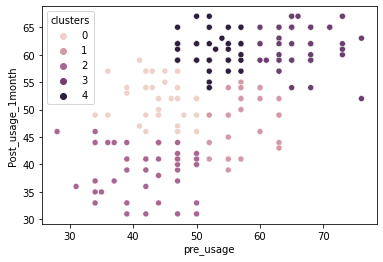

In [ ]:
sns.scatterplot(x="pre_usage", y="Post_usage_1month", hue="clusters", data=card)

In [ ]:
new_data=card[['pre_usage','Post_usage_1month']]
K=range(1,12)
wss=[]
for i in K:
   k_model=cluster.KMeans(n_clusters=i, init="k-means++")
   k_model=k_model.fit(new_data)
   wss_iter=k_model.inertia_
   wss.append(wss_iter)

In [ ]:
center_points=pd.DataFrame({'clusters' : K, 'WSS':wss})
center_points

,clusters,WSS
0,1,38798.295000
1,2,16623.448718
2,3,11043.065637
3,4,8852.863447
4,5,6810.787526
5,6,5522.557246
6,7,4897.625444
7,8,4336.579511
8,9,3900.296005
9,10,3530.989611


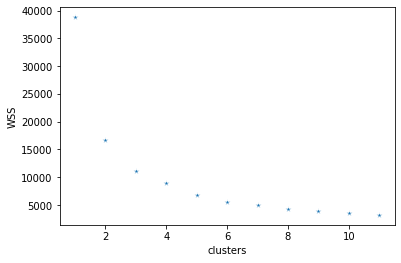

In [ ]:
sns.scatterplot(x='clusters', y='WSS', data=center_points, marker="*")